In [3]:
## Score , Preprocessing
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report, balanced_accuracy_score

## Models
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier


In [4]:
import pandas as pd
from data.data import Data

data_raw = Data().get_all_data()

In [3]:
# df1 is fine for PreProcessing

df1 = data_raw['twitter_MBTI']
df1.drop(df1.columns[0], axis=1, inplace=True)
df1 = df1.rename(columns={'text': 'posts', 'label': 'type'})

df2 = data_raw['MBTI 500']

df3 = data_raw['mbti_1']
df3 = df3[['posts', 'type']]


## Combined all data for PP if desired
data_combined = pd.concat([df1,df1,df3], axis=0)
data_combined.head()

,posts,type
0,@Pericles216 @HierBeforeTheAC @Sachinettiyil T...,intj
1,@Hispanthicckk Being you makes you look cute||...,intj
2,@Alshymi Les balles sont réelles et sont tirée...,intj
3,"I'm like entp but idiotic|||Hey boy, do you wa...",intj
4,@kaeshurr1 Give it to @ZargarShanif ... He has...,intj


In [4]:
# from scripts.Preprocessing_full import full_preprocessing

# data_pp = Preprocessing_full(data_combined)

# TypeError: expected string or bytes-like object

In [5]:
## Data for model selection
data = df2

In [6]:
data['e_i'] = data['type'].astype(str).str[0]
data['s_n'] = data['type'].astype(str).str[1]
data['f_t'] = data['type'].astype(str).str[2]
data['p_j'] = data['type'].astype(str).str[3]

column_list = list(data.columns)[2:]
column_list

['e_i', 's_n', 'f_t', 'p_j']

In [42]:
models_list = [SGDClassifier(), 
               DecisionTreeClassifier(max_depth=5), 
               KNeighborsClassifier(3),
               MultinomialNB()]
models_list

[SGDClassifier(),
 DecisionTreeClassifier(max_depth=5),
 KNeighborsClassifier(n_neighbors=3),
 MultinomialNB()]

In [25]:
def BaselineModel(X_train, X_test, y_train, model_selection):
    count_vectorizer = CountVectorizer()

    X_bow_train = count_vectorizer.fit_transform(X_train)
    X_bow_test = count_vectorizer.fit_transform(X_test)


    ## Apparently, you need to fill out these to arrays to run them through
    ## Some of the beefier models, try to figure out how
    
    model = model_selection

    model.fit(X_bow_train, y_train)
    
    return model, X_bow_test

In [10]:
## Finds the Macro F1 / Balanaced Accuracy Score
def PredictDict(model, X_bow_test, y_test):
    y_pred = cross_val_predict(model, X_bow_test, y_test, cv = 10)
    report = classification_report(y_test, y_pred, output_dict=True)
    bal_acc = balanced_accuracy_score(y_pred, y_test)
    report['bal_acc'] = bal_acc
    return report

For the function below, see if you can modify it to return print functions instead of just doing them, they seem to replicate in the output and it looks ugly.

In [32]:

import numpy as np

## Use our previous code to get F1 Scores for different models
def ModelScore_Binary(column, model, dataset):
    """
    Input the Column from the DataFrame as a string for binary modelling.
    Outputs prints of the Confusion Matrix and the Classification Report.
    """
    y_set = dataset[column]
    X_set = dataset['posts']
    
    
    X_train, X_test, y_train, y_test = train_test_split(X_set,y_set,
                                                    test_size=.3,
                                                    random_state=1) 
    
    
    
    model_fit, X_bow_test = BaselineModel(X_train = X_train, 
                                      X_test = X_test, 
                                      y_train = y_train, 
                                      model_selection = model)
    
    print(f"\n{model} has been fit!")
    
    prediction = PredictDict(model = model_fit, 
                       X_bow_test = X_bow_test, 
                       y_test = y_test)
    
    predict_list = list(prediction.keys())
    
    class_1 = predict_list[0]
    class_2 = predict_list[1]
    macro = predict_list[3]
    
    print("----------------------------------------------------------------")
    print(class_1)
    print(f"F1 Score: {100*round(prediction[class_1]['f1-score'],4)}%")
    print(class_2)
    print(f"F1 Score: {100*round(prediction[class_2]['f1-score'],4)}%")
    print("\n")
    print(f"The Combined Macro F1 Average is:" )
    print(f"{100*round(prediction[macro]['f1-score'],4)}%")
    print(f"The Balanced Accuracy is:" )
    print(f"{100*round(prediction['bal_acc'],4)}%")
    print("----------------------------------------------------------------")
    

In [30]:
ModelScore_Binary(column = column_list[1], 
                    model = models_list[-1], 
                    dataset = data)


MultinomialNB() has been fit!
----------------------------------------------------------------
N ----- F1 Score:
F1: 96.59%
S ----- F1 Score:
F1: 49.21%


The Combined Macro F1 Average is:
72.89999999999999%
The Balanced Accuracy is:
84.91%
----------------------------------------------------------------


In [34]:
## For loop for all the types?

## Okay well it prints everything a few too many times, 
## but it does get the scores out


####################
## Multinomial NB ##
####################

## 3 min per run ##

for type in column_list:
    ModelScore_Binary(column = type,
                        model = models_list[-1],
                        dataset = data)


MultinomialNB() has been fit!
----------------------------------------------------------------
E
F1 Score: 58.57%
I
F1 Score: 90.41%


The Combined Macro F1 Average is:
74.49%
The Balanced Accuracy is:
83.09%
----------------------------------------------------------------

MultinomialNB() has been fit!
----------------------------------------------------------------
N
F1 Score: 96.59%
S
F1 Score: 49.21%


The Combined Macro F1 Average is:
72.89999999999999%
The Balanced Accuracy is:
84.91%
----------------------------------------------------------------

MultinomialNB() has been fit!
----------------------------------------------------------------
F
F1 Score: 83.95%
T
F1 Score: 91.17%


The Combined Macro F1 Average is:
87.56%
The Balanced Accuracy is:
87.03%
----------------------------------------------------------------

MultinomialNB() has been fit!
----------------------------------------------------------------
J
F1 Score: 78.86999999999999%
P
F1 Score: 84.75%


The Combined Ma

In [35]:

## Maybe saving the results as a dict for the return and then
# calling them out afterwards is better use of the function?

###################
## SGD Classifier ##
###################

## 4.5 min per type ##


for type in column_list:
    ModelScore_Binary(column = type,
                    model = models_list[0],
                    dataset = data)


SGDClassifier() has been fit!
----------------------------------------------------------------
E
F1 Score: 71.84%
I
F1 Score: 91.28%


The Combined Macro F1 Average is:
81.56%
The Balanced Accuracy is:
81.94%
----------------------------------------------------------------

SGDClassifier() has been fit!
----------------------------------------------------------------
N
F1 Score: 97.35000000000001%
S
F1 Score: 69.11%


The Combined Macro F1 Average is:
83.23%
The Balanced Accuracy is:
85.69%
----------------------------------------------------------------

SGDClassifier() has been fit!
----------------------------------------------------------------
F
F1 Score: 84.36%
T
F1 Score: 91.67%


The Combined Macro F1 Average is:
88.01%
The Balanced Accuracy is:
87.77000000000001%
----------------------------------------------------------------

SGDClassifier() has been fit!
----------------------------------------------------------------
J
F1 Score: 77.25%
P
F1 Score: 83.26%


The Combined Ma

In [36]:
###################
## Decision Tree ##
###################

## 4 min per type ##


for type in column_list:
    ModelScore_Binary(column = type,
                    model = models_list[1],
                    dataset = data)


DecisionTreeClassifier(max_depth=5) has been fit!
----------------------------------------------------------------
E
F1 Score: 61.09%
I
F1 Score: 89.82%


The Combined Macro F1 Average is:
75.46000000000001%
The Balanced Accuracy is:
79.47%
----------------------------------------------------------------

DecisionTreeClassifier(max_depth=5) has been fit!
----------------------------------------------------------------
N
F1 Score: 96.63000000000001%
S
F1 Score: 48.29%


The Combined Macro F1 Average is:
72.46000000000001%
The Balanced Accuracy is:
86.52%
----------------------------------------------------------------

DecisionTreeClassifier(max_depth=5) has been fit!
----------------------------------------------------------------
F
F1 Score: 66.25999999999999%
T
F1 Score: 85.72999999999999%


The Combined Macro F1 Average is:
76.0%
The Balanced Accuracy is:
79.35%
----------------------------------------------------------------

DecisionTreeClassifier(max_depth=5) has been fit!
-----

In [37]:

  ####################
## K Nearest Neighbors ##
  ####################


# 15 MINS PER TYPE #

for type in column_list:
    ModelScore_Binary(column = type,
                    model = models_list[2],
                    dataset = data)


KNeighborsClassifier(n_neighbors=3) has been fit!
----------------------------------------------------------------
E
F1 Score: 39.550000000000004%
I
F1 Score: 86.21%


The Combined Macro F1 Average is:
62.88%
The Balanced Accuracy is:
68.42%
----------------------------------------------------------------

KNeighborsClassifier(n_neighbors=3) has been fit!
----------------------------------------------------------------
N
F1 Score: 95.83%
S
F1 Score: 23.549999999999997%


The Combined Macro F1 Average is:
59.69%
The Balanced Accuracy is:
78.9%
----------------------------------------------------------------

KNeighborsClassifier(n_neighbors=3) has been fit!
----------------------------------------------------------------
F
F1 Score: 66.25%
T
F1 Score: 81.75%


The Combined Macro F1 Average is:
74.0%
The Balanced Accuracy is:
73.76%
----------------------------------------------------------------

KNeighborsClassifier(n_neighbors=3) has been fit!
----------------------------------------

In [5]:
# So Here are the results
# I could have made this a part of the function but I didn't IDK why
# I'll Do it while waiting anyways

### Multinomial NB
MultiNB_List = [['E_f1', 58.57],
            ['I_f1', 90.41],
            ['E_I_f1', 74.49],
            ['E_I_Bal_Acc', 83.09],
            ['N_f1', 96.59],
            ['S_f1', 49.21],
            ['N_S_f1', 72.9],
            ['N_S_Bal_Acc', 84.91],
            ['F_f1', 83.95],
            ['T_f1', 91.17],
            ['F_T_f1', 87.56],
            ['F_T_Bal_Acc', 87.03],
            ['J_f1', 79.87],
            ['P_f1', 84.75],
            ['J_P_f1', 81.81],
            ['J_P_Bal_Acc', 81.83]
]

MultiNB_Avg = [['MultiNB_MBTI_F1_AVG',
                (MultiNB_List[2][1] + MultiNB_List[6][1] + MultiNB_List[10][1] + MultiNB_List[14][1]) / 4],
               ['MultiNB_MBTI_Bal_Acc_AVG',
                (MultiNB_List[3][1] + MultiNB_List[7][1] + MultiNB_List[11][1] + MultiNB_List[15][1]) / 4]
               ]
               

### SGD Classifier
SGD_List = [['E_f1', 71.84],
            ['I_f1',91.28],
            ['E_I_f1', 81.56],
            ['E_I_Bal_Acc', 91.28],
            ['N_f1', 97.35],
            ['S_f1', 69.11],
            ['N_S_f1', 83.23],
            ['N_S_Bal_Acc', 85.69],
            ['F_f1', 84.36],
            ['T_f1', 91.67],
            ['F_T_f1', 88.01],
            ['F_T_Bal_Acc', 87.77],
            ['J_f1', 77.25],
            ['P_f1', 83.26],
            ['J_P_f1', 80.26],
            ['J_P_Bal_Acc', 80.19]]

SGD_Avg = [['SGD_MBTI_F1_AVG',
                (SGD_List[2][1] + SGD_List[6][1] + SGD_List[10][1] + SGD_List[14][1]) / 4],
               ['SGD_MBTI_Bal_Acc_AVG',
                (SGD_List[3][1] + SGD_List[7][1] + SGD_List[11][1] + SGD_List[15][1]) / 4]
               ]


### Decision Tree
DecisionTree_List = [['E_f1', 61.09],
            ['I_f1', 89.82],
            ['E_I_f1', 75.46],
            ['E_I_Bal_Acc', 79.47],
            ['N_f1', 72.46],
            ['S_f1', 48.29],
            ['N_S_f1', 72.46],
            ['N_S_Bal_Acc', 86.52],
            ['F_f1', 66.26],
            ['T_f1', 85.73],
            ['F_T_f1', 76.0],
            ['F_T_Bal_Acc', 79.35],
            ['J_f1', 69.41],
            ['P_f1', 81.31],
            ['J_P_f1', 75.36],
            ['J_P_Bal_Acc', 77.03]
]

DecisionTree_Avg = [['DecisionTree_MBTI_F1_AVG',
                (DecisionTree_List[2][1] + DecisionTree_List[6][1] + DecisionTree_List[10][1] + DecisionTree_List[14][1]) / 4],
               ['DecisionTree_MBTI_Bal_Acc_AVG',
                (DecisionTree_List[3][1] + DecisionTree_List[7][1] + DecisionTree_List[11][1] + DecisionTree_List[15][1]) / 4]
               ]


### KNN
KNN_List = [['E_f1', 39.55],
            ['I_f1', 86.21],
            ['E_I_f1', 62.88],
            ['E_I_Bal_Acc', 68.42],
            ['N_f1', 95.83],
            ['S_f1', 23.55],
            ['N_S_f1', 59.69],
            ['N_S_Bal_Acc', 78.9],
            ['F_f1', 66.23],
            ['T_f1', 81.75],
            ['F_T_f1', 74.0],
            ['F_T_Bal_Acc', 81.75],
            ['J_f1', 58.01],
            ['P_f1', 72.65],
            ['J_P_f1', 65.33],
            ['J_P_Bal_Acc', 65.87]
]

KNN_Avg = [['KNN_MBTI_F1_AVG',
                ((KNN_List[2][1] + KNN_List[6][1] + KNN_List[10][1] + KNN_List[14][1]) / 4)],
               ['KNN_MBTI_Bal_Acc_AVG',
                ((KNN_List[3][1] + KNN_List[7][1] + KNN_List[11][1] + KNN_List[15][1]) / 4)]
               ]

In [6]:

def model_score(model):
    score_df = pd.DataFrame(model, columns=('Metric','Score'))
    return score_df

MultiNB_df = model_score(MultiNB_List)
MultiNB_df['Model'] = 'MultiNB'
SGD_df = model_score(SGD_List)
SGD_df['Model'] = 'SGD'
DecisionTree_df = model_score(DecisionTree_List)
DecisionTree_df['Model'] = 'DecisionTree'
KNN_df = model_score(KNN_List)
KNN_df['Model'] = 'KNN'

score_df = pd.concat([MultiNB_df,KNN_df,DecisionTree_df,SGD_df])
score_df

,Metric,Score,Model
0,E_f1,58.57,MultiNB
1,I_f1,90.41,MultiNB
2,E_I_f1,74.49,MultiNB
3,E_I_Bal_Acc,83.09,MultiNB
4,N_f1,96.59,MultiNB
...,...,...,...
11,F_T_Bal_Acc,87.77,SGD
12,J_f1,77.25,SGD
13,P_f1,83.26,SGD
14,J_P_f1,80.26,SGD


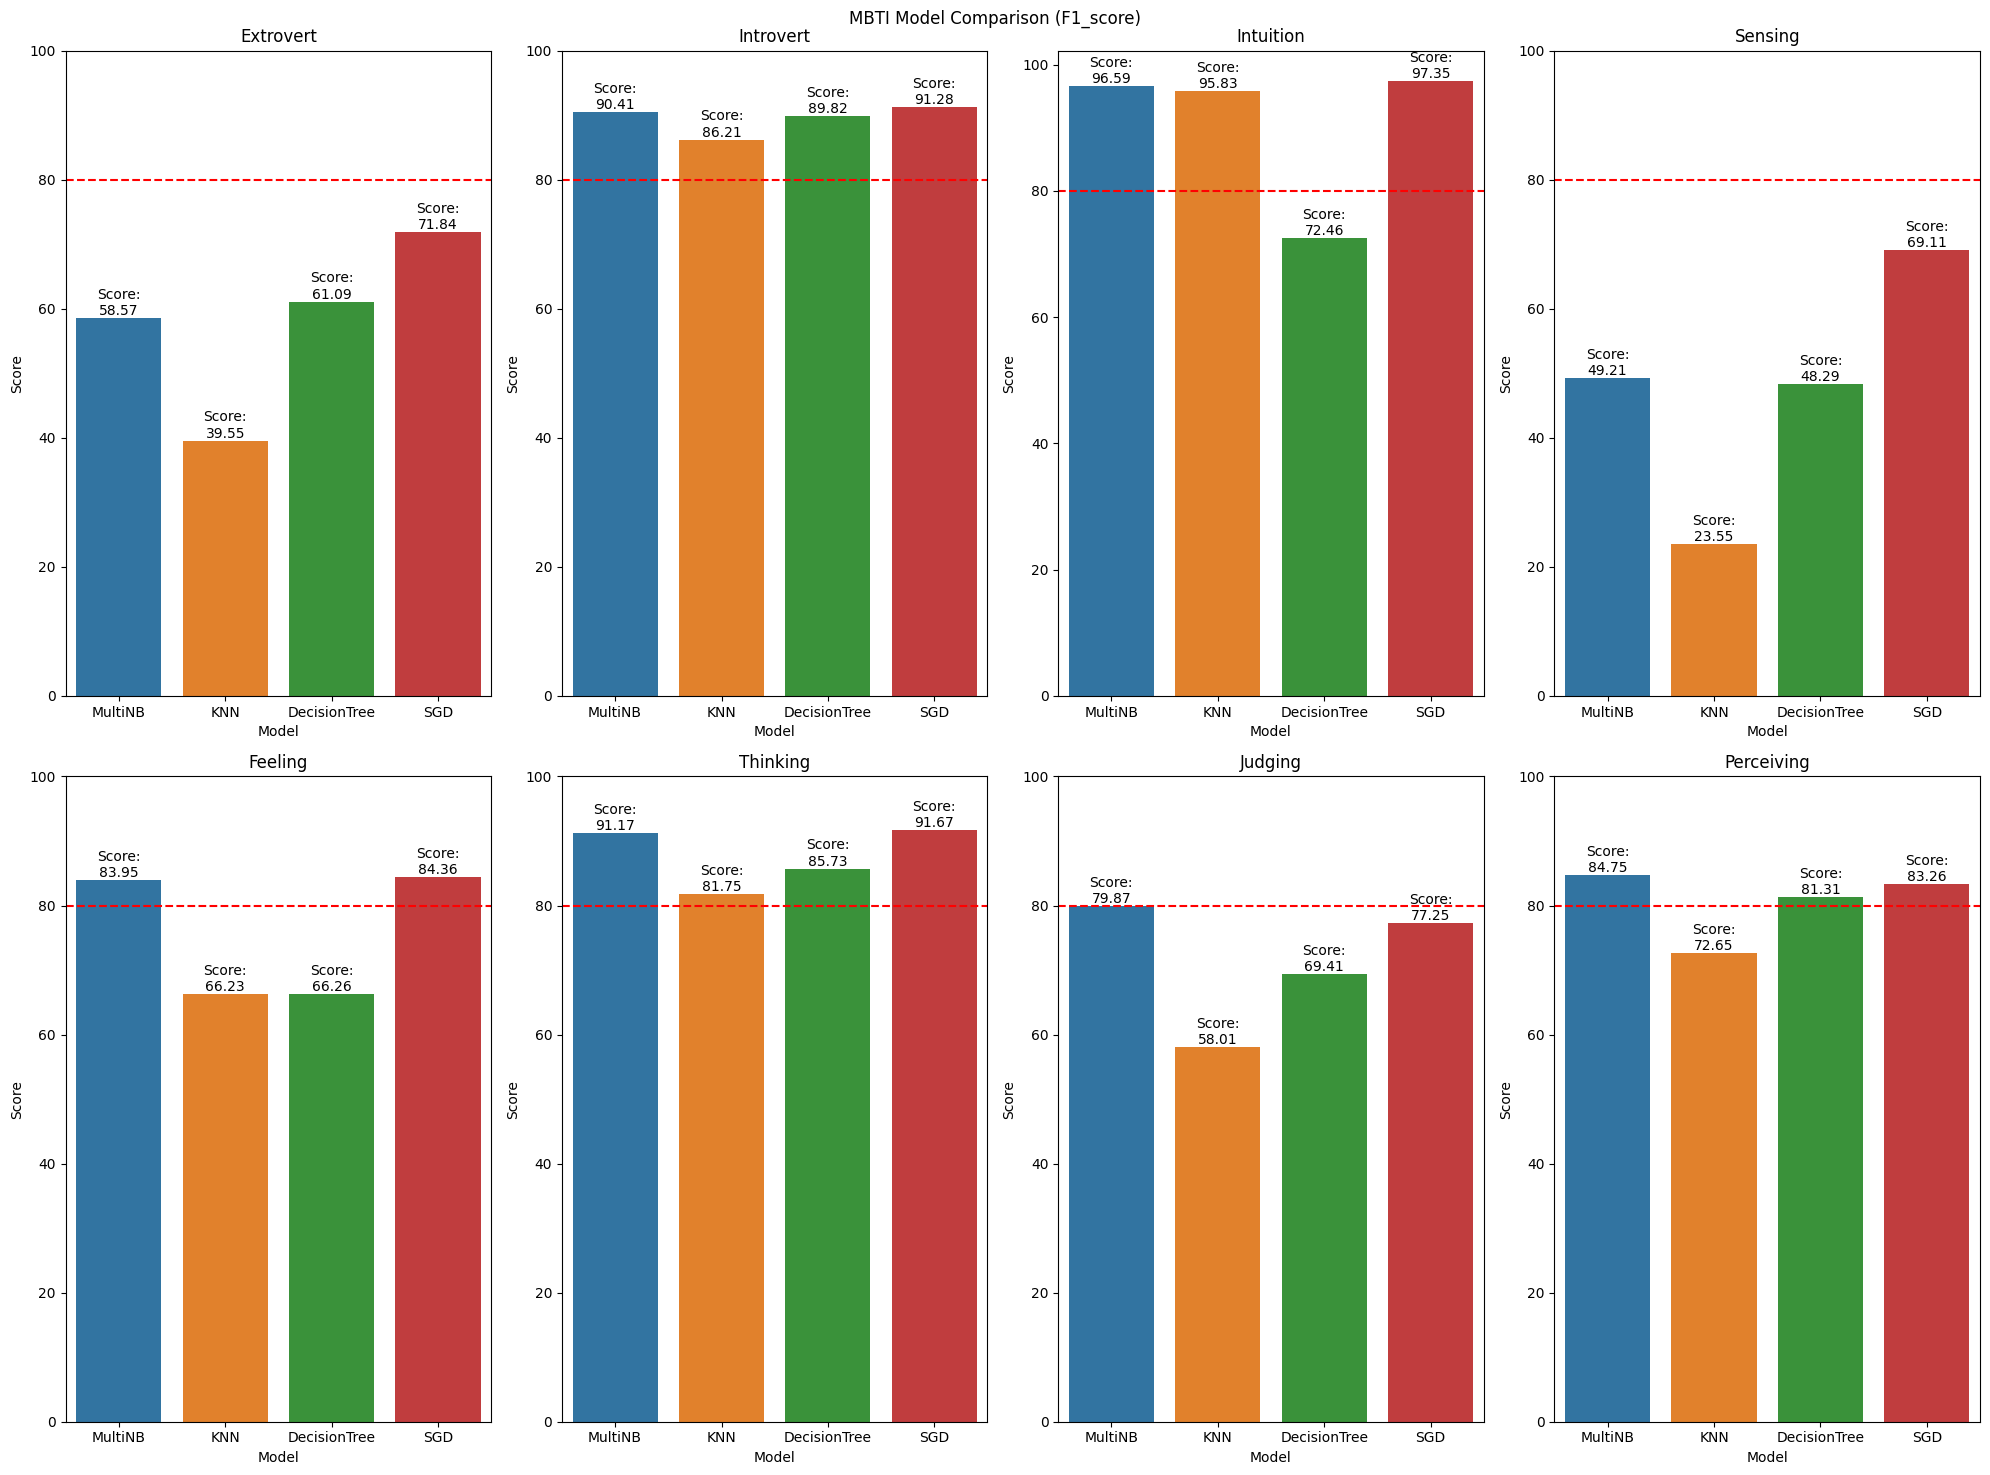

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, axes = plt.subplots(2,4)
fig.suptitle("MBTI Model Comparison (F1 - Score)")

def barplotter_score_df(mask,plot_name,column,ax):
    masker = score_df[column] == mask
    sns.barplot(score_df[masker], x = 'Model', y= 'Score', ax = ax)
    ax.set_title(plot_name)
    ax.axhline(y=80, color='r', linestyle = 'dashed')
    ax.bar_label(ax.containers[0], fmt = 'Score:\n%.2f', label_type='edge')

barplotter_score_df('E_f1','Extrovert', 'Metric', axes[0,0])
barplotter_score_df('I_f1','Introvert', 'Metric', axes[0,1])
barplotter_score_df('N_f1','Intuition', 'Metric', axes[0,2])
barplotter_score_df('S_f1','Sensing', 'Metric', axes[0,3])
barplotter_score_df('F_f1','Feeling', 'Metric', axes[1,0])
barplotter_score_df('T_f1','Thinking', 'Metric', axes[1,1])
barplotter_score_df('J_f1','Judging', 'Metric', axes[1,2])
barplotter_score_df('P_f1','Perceiving', 'Metric', axes[1,3])

plt.setp(axes, yticks = [0,20,40,60,80,100])

fig.set_figheight(15)
fig.set_figwidth(20)
fig.tight_layout()

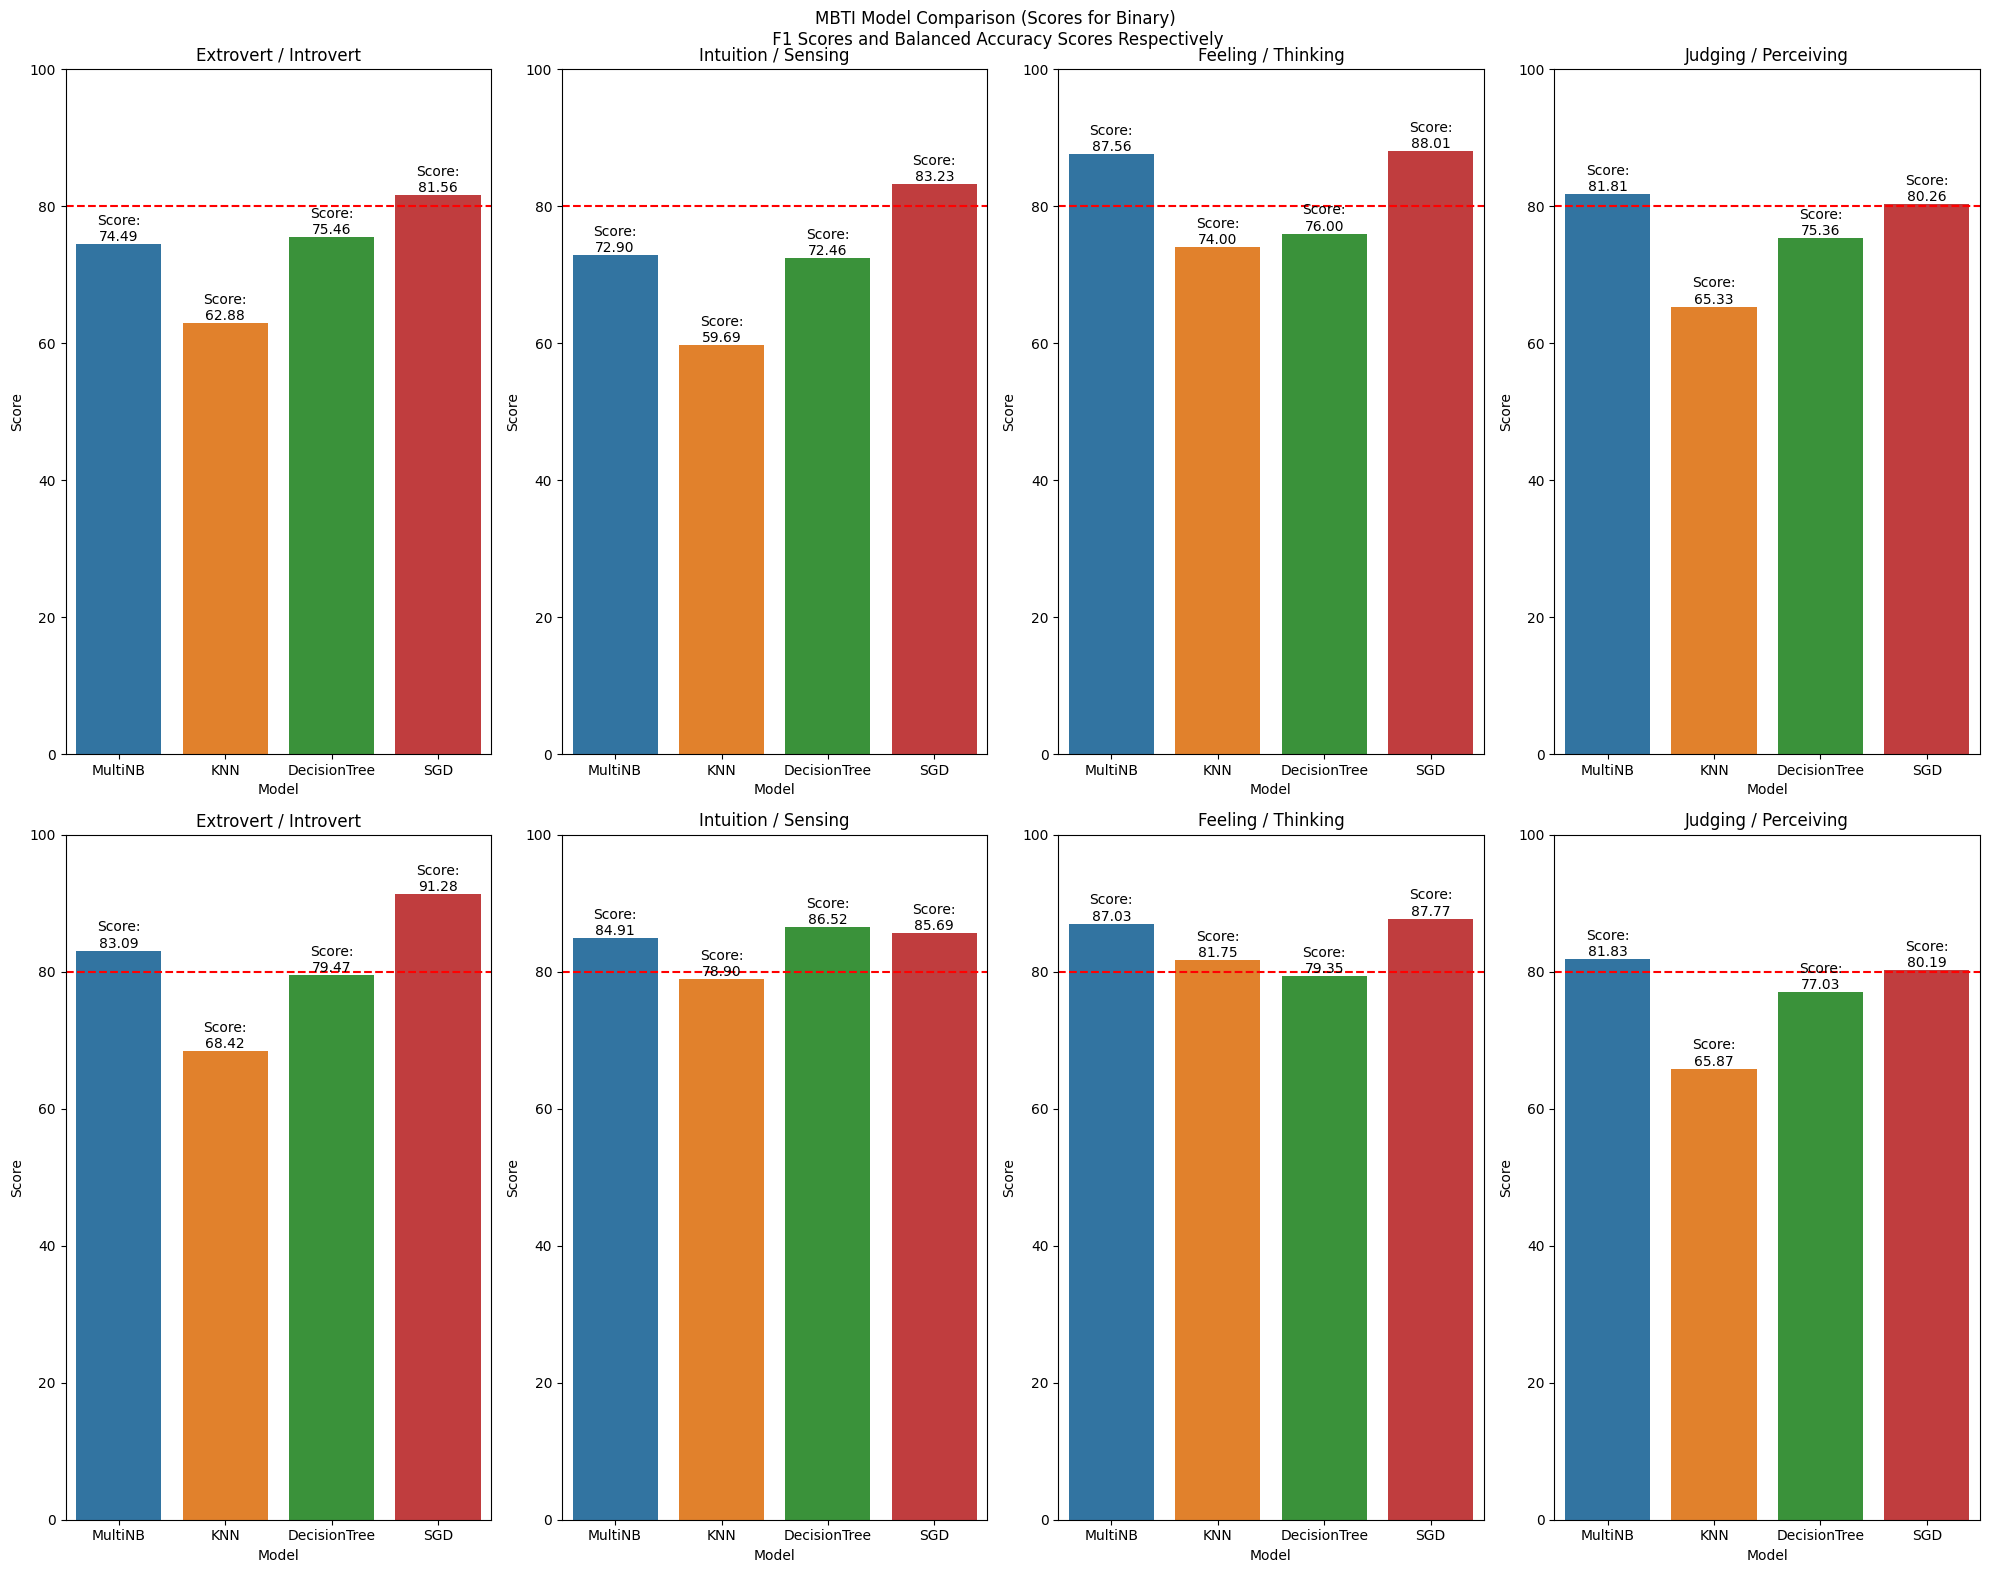

In [40]:
fig, axes = plt.subplots(2,4)
fig.suptitle("MBTI Model Comparison (Scores for Binary)\n F1 Scores and Balanced Accuracy Scores Respectively")

barplotter_score_df('E_I_f1','Extrovert / Introvert', 'Metric', axes[0,0])
barplotter_score_df('N_S_f1','Intuition / Sensing', 'Metric', axes[0,1])
barplotter_score_df('F_T_f1','Feeling / Thinking', 'Metric', axes[0,2])
barplotter_score_df('J_P_f1','Judging / Perceiving', 'Metric', axes[0,3])
barplotter_score_df('E_I_Bal_Acc','Extrovert / Introvert', 'Metric', axes[1,0])
barplotter_score_df('N_S_Bal_Acc','Intuition / Sensing', 'Metric', axes[1,1])
barplotter_score_df('F_T_Bal_Acc','Feeling / Thinking', 'Metric', axes[1,2])
barplotter_score_df('J_P_Bal_Acc','Judging / Perceiving', 'Metric', axes[1,3])

plt.setp(axes, yticks = [0,20,40,60,80,100])

fig.set_figheight(16)
fig.set_figwidth(20)
fig.tight_layout()

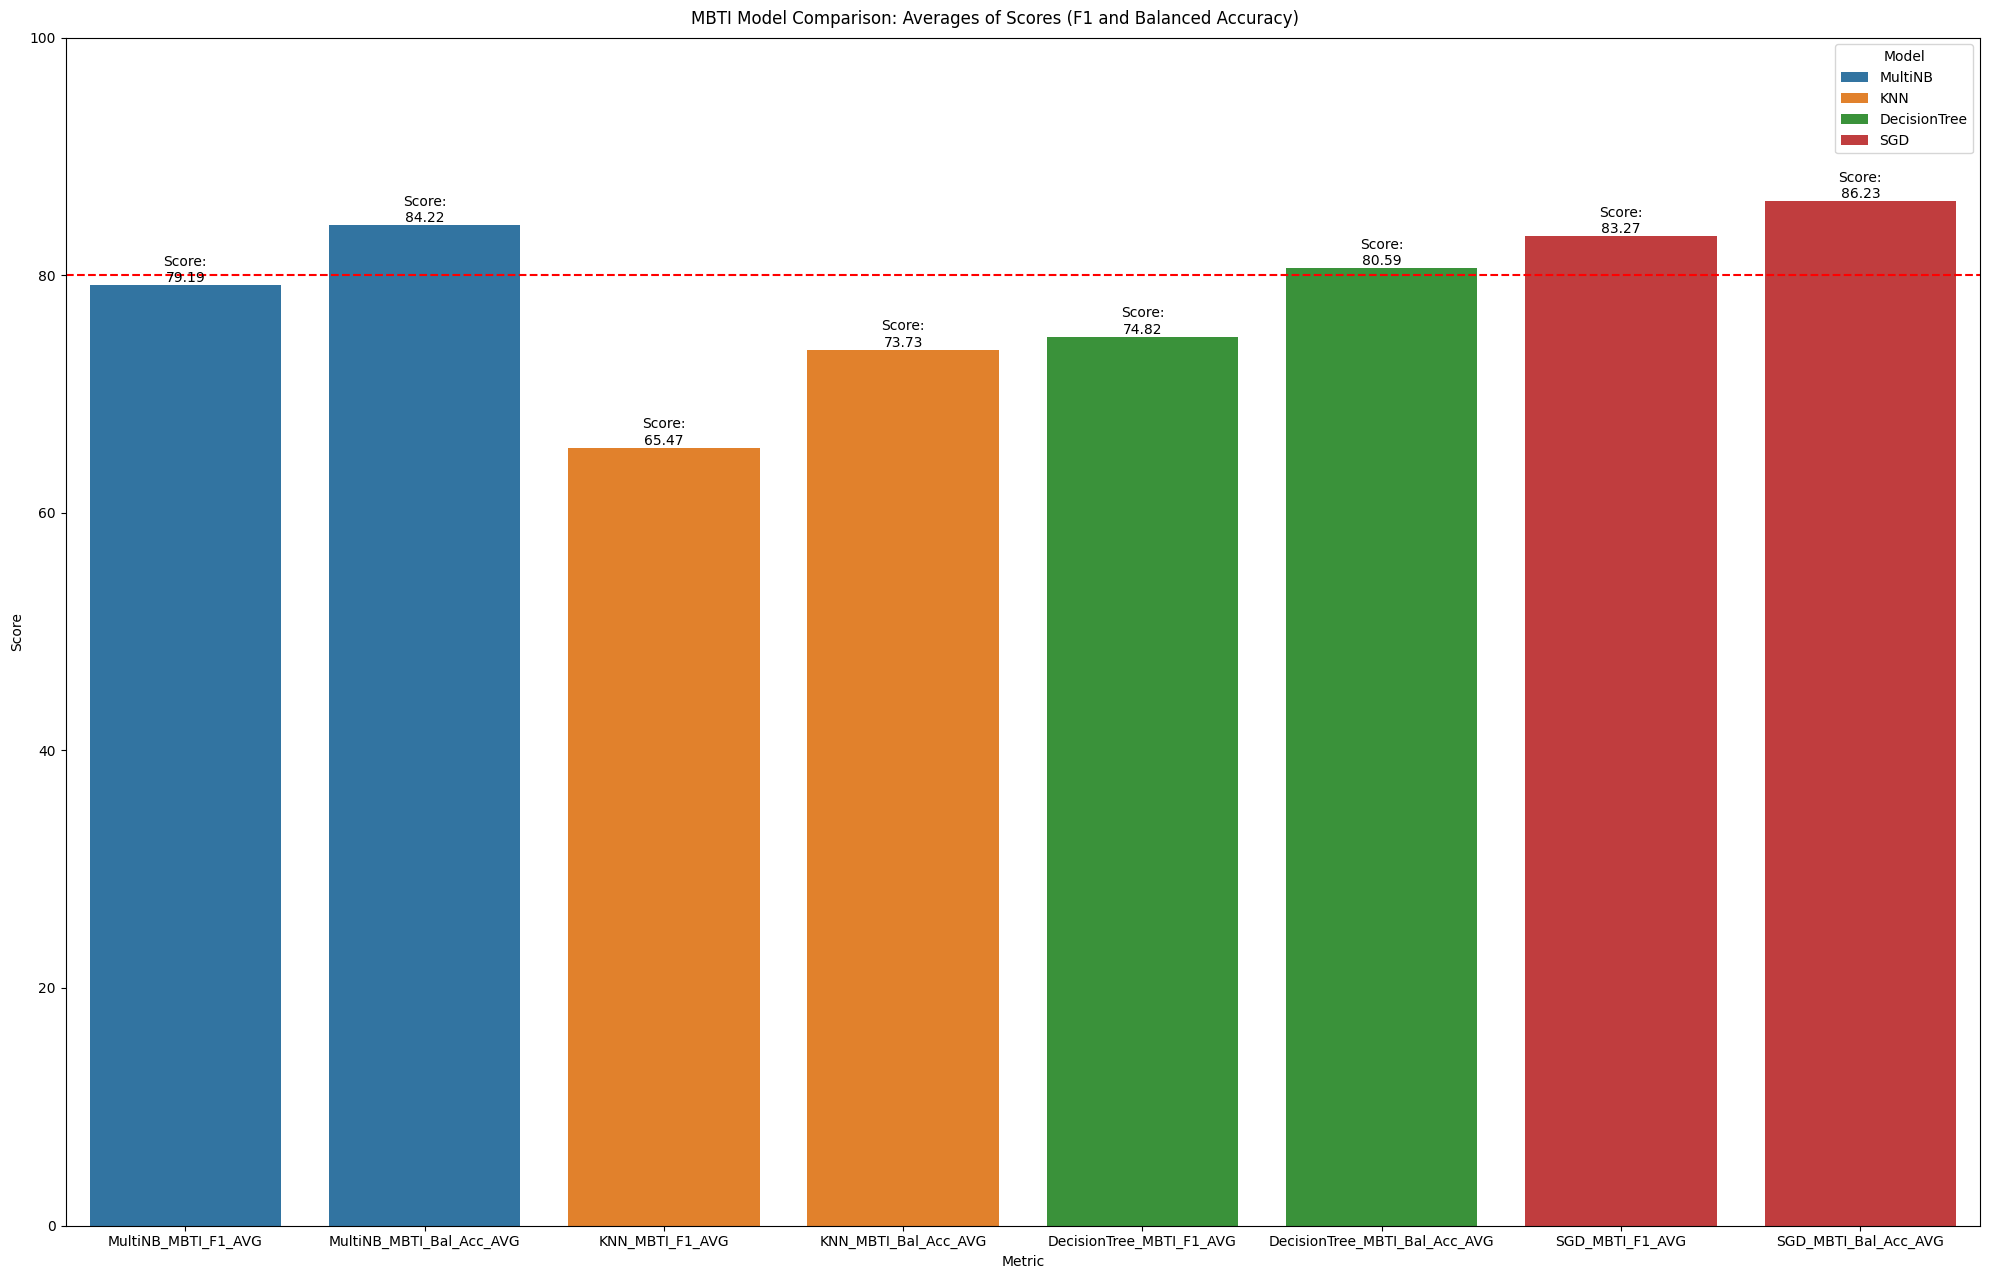

In [111]:
plt.figure(figsize=(20, 13))
plt.suptitle("MBTI Model Comparison: Averages of Scores (F1 and Balanced Accuracy)")
plt.axhline(y=80, color='r', linestyle = 'dashed')

ax = sns.barplot(data = score_avg_df,
            x = 'Metric', 
            y = 'Score',
            hue = 'Model',
            width=.8,
            dodge=False)

for c in range(4):
    plt.bar_label(ax.containers[c], fmt = 'Score:\n%.2f', label_type='edge')

plt.yticks([0,20,40,60,80,100])

plt.tight_layout()